در بخش content دو فولدر خالی به نام های temp1 ,temp2 بسازید

RUN!

In [1]:
import numpy as np
!pip install pillow
import matplotlib.pyplot as plt
import numpy as np
!pip install Image
import cv2
import os
from PIL import Image
!pip install image_slicer
import image_slicer
from PIL import ImageDraw, ImageFont
import os
import PIL
from sklearn.datasets import load_sample_image
from sklearn.feature_extraction import image
from PIL import Image
from numpy import linalg 
from os import listdir
from matplotlib import image
from skimage import color

     |████████████████████████████████| 7.9MB 5.6MB/s 
  Created wheel for Image: filename=image-1.5.33-py2.py3-none-any.whl size=19482 sha256=7ddacd3a0c90040a1e5d1b1009448c0e7f69ea592056d061aaca88ae68ca5249
  Stored in directory: /root/.cache/pip/wheels/87/4c/60/d5904e69c837fcdea7e03ffa0c657f35ced7e398c6f3ca17cc
Successfully built Image
     |████████████████████████████████| 2.2MB 4.2MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Visualization
import matplotlib.pyplot as plt

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
import tensorflow as tf
#System
import os
print(os.listdir("../content"))

['.config', 'temp2', '.ipynb_checkpoints', 'temp1', 'a.jpg', 'olivetti_faces.npy', 'olivetti_faces_target.npy', 'sample_data']


In [5]:
from matplotlib.pyplot import imshow

In [6]:
import warnings
warnings.filterwarnings('ignore')
print("Warnings ignored!!")

Warnings ignored!!


In [42]:
data=np.load("../content/olivetti_faces.npy")
target=np.load("/content/olivetti_faces_target.npy")

In [10]:
print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each image is {}x{}".format(data.shape[1],data.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(data[0][0,:4]))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]


In [11]:
print("unique target number:",np.unique(target))

unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [12]:
def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    
    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

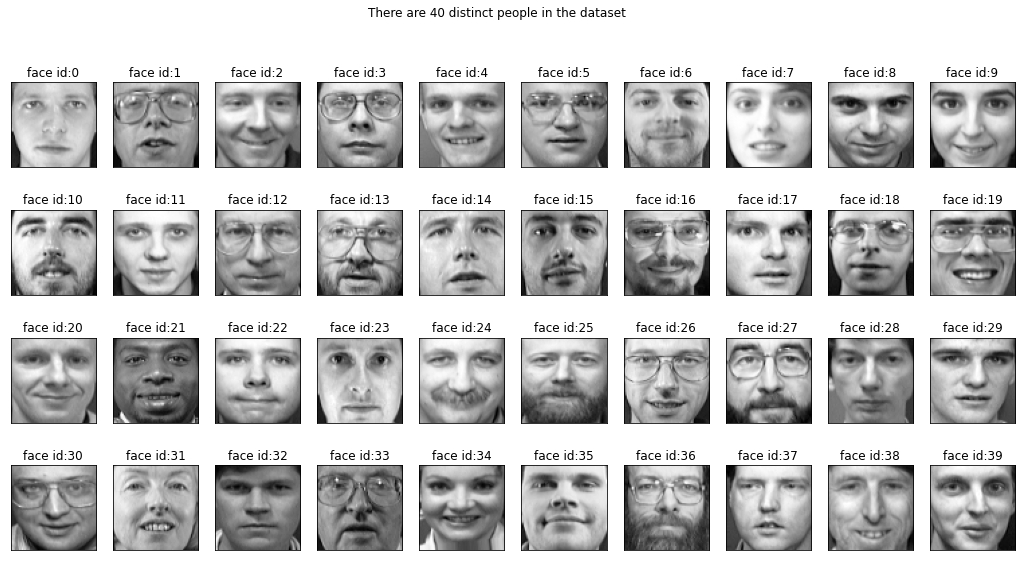

In [13]:
show_40_distinct_people(data, np.unique(target))

In [14]:
def show_10_faces_of_n_subject(images, subject_ids):
    cols=10# each subject has 10 distinct face images
    rows=(len(subject_ids)*10)/cols #
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    #axarr=axarr.flatten()
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))

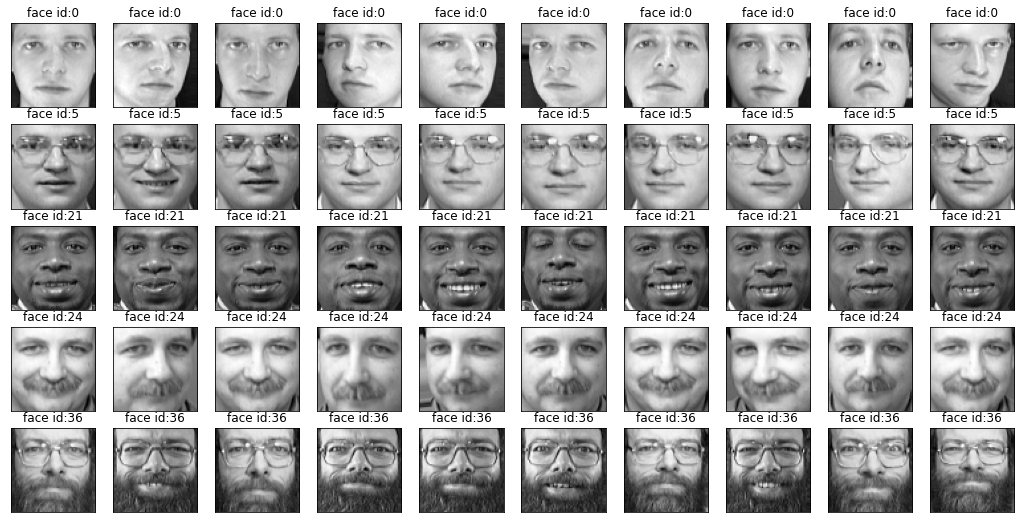

In [15]:
#You can playaround subject_ids to see other people faces
show_10_faces_of_n_subject(images=data, subject_ids=[0,5, 21, 24, 36])

In [43]:
#برداشتن دیتا و تارگت از دیتاست
X = data
y = target

print(np.shape(y))

(400,)


In [44]:
#عکس اول هر فرد در مجموعه ترین و بقیه در مجموعه تست
t=[]
tr=[]
for i in range(0,399):
  if(i%10 ==0):
    tr.append(i)
  elif(i%10 !=0):
    t.append(i)


trImages=X[tr]
trLabels=y[tr]
tImages=X[t]
tLabels=y[t]


<class 'numpy.ndarray'>


دیدن عکس اصلی... در دیتاست و حین محاسبات فشرده شده برای همین اونشکلی میبین ولی همینه در اصل

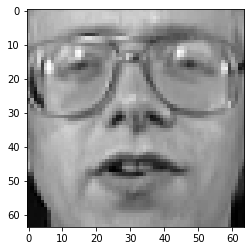

In [18]:
im = Image.fromarray(trImages[0],'L')
im.save('/content/a.jpg')
imshow(trImages[1], cmap='gray')


In [81]:
#توابع مورد نیاز برای پیاده سازی متریک فاصله ما


#تابع سگمنت کردن هر دو عکس دریافتی
#تعداد سگمنتهای دو عکس باید مساوی باشد و بسته به سلیقتون باید در خط کد اسلایسر وارد کنید.
def slice_x_y(z1,z2):
  im = Image.fromarray(z1,'L')
  im.save("/content/temp1/z1.png")
  tiles = image_slicer.slice("/content/temp1/z1.png", 16, save=False)
  image_slicer.save_tiles(tiles, directory='/content/temp1')
  os.remove("/content/temp1/z1.png")

  im2 = Image.fromarray(z2, "L")
  #im2=im2.convert("L")
  im2.save("/content/temp2/z2.png")
  tiles2 = image_slicer.slice("/content/temp2/z2.png", 16, save=False)
  image_slicer.save_tiles(tiles2, directory='/content/temp2')
  os.remove("/content/temp2/z2.png")

#محاسبه فرمول 14 مقاله
def  dissz(z1, z2,p,q):
  z1t=np.asarray(z1).T
  z2t=np.asarray(z2).T
  a=1/(2*p-1)
  mul=z1t.dot(z1)
  mul2=z2t.dot(z2)

  r=a*mul+a*mul2
  landar=linalg.eigvals(r)
  t=0
  for j in range(0,q) :
    t=t+pow((landar[j]-0.5),2)
  dz=(4/q)*t
  return dz


#محاسبه فرمول 15 مقاله
def  disszt(z1, z2,p,q):
  z1t=np.asarray(z1).T
  z2t=np.asarray(z2).T
  a=1/(2*q-1)
  mul=z1.dot(z1t)
  mul2=z2.dot(z2t)

  rt=a*mul+a*mul2
  landart=linalg.eigvals(rt)
  tt=0
  for j in range(0,p) :
    tt=tt+pow((landart[j]-0.5),2)
  dzt=(4/p)*tt
  return dzt  


 #محاسبه فرمول 16 مقاله 
def diss(z1,z2, p, q):
  d=dissz(z1,z2,p,q)
  dt=disszt(z1,z2,p,q)
  dis=(d+dt)/2
  return dis


#متریک ساخته نهایی
#سایز سگمنتهای حاصل را باید طول و عرضشان را در خط کد سه تا مانده به آخر وارد کنید. این پارامتر تابع 16 است 
def mymetric(a,b):
  slice_x_y(a,b)
  folder_pathx = (r'/content/temp1')
  folder_pathy = (r'/content/temp2')
  loaded_imagesx = list()
  for filename in listdir(folder_pathx):
    img_datax = color.rgb2gray(image.imread(folder_pathx +"/"+ filename))
    loaded_imagesx.append(img_datax)
  loaded_imagesy = list()
  for filename in listdir(folder_pathy):
    img_datay = color.rgb2gray(image.imread(folder_pathy +"/"+ filename))
    loaded_imagesy.append(img_datay)
  dis=[]
  for imagest in loaded_imagesx:
    for imagestr in loaded_imagesy:
      dis.append(diss(imagest, imagestr, 16, 16))
  dissf=np.mean(dis)   
  return dissf
  


In [74]:
# اگر میخواهید که به صورت دستی عدم شباهت دو عکس دلخواه را بر حسب متریک ساخته شده بیابید اجرا کنید
#در لوپ ساخته شده میتوانید فاسله هر نمونه تست با همه ترین ها را ببینید.
# اگر فقط میخواهید برنامه اصلی را اجرا کنید از این بخش صرف نظر کنید.
z1=np.asarray(trImages[2])
z2=np.asarray(tImages[1])

mymetric(z1,z2)

for iTeI in range(1,50):
  print(arrayL2Norm)# store distance of a test image from all train images
  arrayL2Norm = np.array([]) 
  for jTrI in range(8,40):  
    l2norm = mymetric(np.asarray(trImages[jTrI]), np.asarray(tImages[iTeI])) # distance between two images; 255 is max. pixel value ==> normalization   
    arrayL2Norm = np.append(arrayL2Norm, l2norm)


[3.65177907+0.j 4.27831893+0.j 4.00786529+0.j 4.06798415+0.j
 3.66065909+0.j 4.05541343+0.j 4.47138942+0.j 3.97135941+0.j
 4.33172932+0.j 4.02726035+0.j 4.28459845+0.j 3.8449556 +0.j
 3.87888122+0.j 3.74699937+0.j 3.9954993 +0.j 4.07071917+0.j
 4.09242929+0.j 3.94356943+0.j 4.2444908 +0.j 4.2293199 +0.j
 5.11185226+0.j 3.90079082+0.j 3.66183488+0.j]
[3.65787959+0.j 3.98048917+0.j 3.70284152+0.j 3.94535514+0.j
 3.5332609 +0.j 3.56607841+0.j 3.43238894+0.j 3.66182282+0.j
 3.74188468+0.j 3.76120599+0.j 3.61652701+0.j 3.90285522+0.j
 3.89136791+0.j 4.69439724+0.j 3.5812644 +0.j 3.35873333+0.j
 3.72790389+0.j 3.41430761+0.j 3.65217062+0.j 3.62868734+0.j
 4.17572558+0.j 3.62521182+0.j 3.68941215+0.j 3.37478967+0.j
 4.66935918+0.j 4.08327581+0.j 3.68981758+0.j 3.94462726+0.j
 3.64801369+0.j 3.80527825+0.j 4.54551594+0.j 3.71746245+0.j]
[3.98064037+0.j 4.33605541+0.j 4.0401481 +0.j 4.29145696+0.j
 3.85790094+0.j 3.88196962+0.j 3.75140972+0.j 3.999954  +0.j
 4.07610644+0.j 4.0948003 +0.j 3.9490

In [72]:
arrayL2Norm

array([3.8014101 +0.j, 4.44559892+0.j, 4.17123078+0.j, 4.24531061+0.j,
       3.81303795+0.j, 4.21831428+0.j, 4.64799787+0.j, 4.13607937+0.j,
       4.50446518+0.j, 4.19958098+0.j, 4.45303175+0.j, 4.00875614+0.j,
       4.03135847+0.j, 3.90256148+0.j, 4.16521616+0.j, 4.23350628+0.j,
       4.2563489 +0.j, 4.10856037+0.j, 4.41861174+0.j, 4.39991955+0.j,
       5.31532938+0.j, 4.05681133+0.j, 3.81614234+0.j, 4.21445337+0.j,
       3.87559966+0.j, 4.14303044+0.j, 4.11331019+0.j, 4.74426144+0.j,
       4.10326133+0.j, 4.18653496+0.j, 3.81946306+0.j, 5.27995518+0.j,
       4.63484725+0.j, 4.18070401+0.j, 4.45976634+0.j, 4.130895  +0.j,
       4.31129293+0.j, 5.12805343+0.j, 4.21185607+0.j])

In [56]:
numTrainImages = np.shape(trLabels)[0] # so many train images
numTestImages = np.shape(tLabels)[0] # so many test images
print(numTestImages)
print(numTrainImages)

359
40


In [64]:
#الگوریتم nn
#متریک:مدل ما
#نتایجی که میبیند حاصل از اجرای این قطعه در حالیست که کدهای توابع متریک در حالت سایز پچ 2*2 تنظیم شده است

paramk = 1 # parameter k of k-nearest neighbors
numTrainImages = np.shape(trLabels)[0] # so many train images
numTestImages = np.shape(tLabels)[0] # so many test images
numErrs=0
arrayKNNLabels = np.array([])
for iTeI in range(0,numTestImages):
  atestfromalltrainarray = np.array([]) # store distance of a test image from all train images
  for jTrI in range(numTrainImages):  
    distance = mymetric(np.asarray(trImages[jTrI]), np.asarray(tImages[iTeI])) # distance between two images; 255 is max. pixel value ==> normalization   
    atestfromalltrainarray = np.append(atestfromalltrainarray, distance)
    
  sIndex = np.argsort(atestfromalltrainarray) # sorting distance and returning indices that achieves sort
  
  kLabels = trLabels[sIndex[0:paramk]] # choose first k labels  
  (values, counts) = np.unique(kLabels, return_counts=True) # find unique labels and their counts
  arrayKNNLabels = np.append(arrayKNNLabels, values[np.argmax(counts)])
  print(atestfromalltrainarray[sIndex[0]], kLabels, arrayKNNLabels[-1], tLabels[iTeI])
  if arrayKNNLabels[-1] != tLabels[iTeI]:
    numErrs += 1
    print(numErrs,"/",iTeI)
print("# Classification Errors= ", numErrs, "% accuracy= ", 100.*(numTestImages-numErrs)/numTestImages)
  

(3.495302908871122+0j) [0] 0.0 0
(3.3137138718092034+0j) [0] 0.0 0
(3.6040286570628033+0j) [0] 0.0 0
(3.5758597169472615+0j) [0] 0.0 0
(3.3053886910035475+0j) [0] 0.0 0
(3.491870126952823+0j) [0] 0.0 0
(3.785794015438168+0j) [0] 0.0 0
(3.5102936019749063+0j) [0] 0.0 0
(3.599999014564245+0j) [0] 0.0 0
(3.5507187646061893+0j) [0] 0.0 1
1 / 9
(3.550301961904388+0j) [0] 0.0 1
2 / 10
(3.4834837527250784+0j) [0] 0.0 1
3 / 11
3.28818862058555 [0] 0.0 1
4 / 12
(3.667643593835468+0j) [0] 0.0 1
5 / 13
(3.58182431180592+0j) [0] 0.0 1
6 / 14
(3.640427341811808+0j) [0] 0.0 1
7 / 15
3.5768838061962573 [0] 0.0 1
8 / 16
(3.486539007510353+0j) [0] 0.0 1
9 / 17
(3.838613162640973+0j) [0] 0.0 2
10 / 18
(3.9570276510850504+0j) [0] 0.0 2
11 / 19
(4.0140935287342865+0j) [0] 0.0 2
12 / 20
(3.8786482306008443+0j) [0] 0.0 2
13 / 21
(3.619983774725679+0j) [0] 0.0 2
14 / 22
(3.7305721239417915+0j) [0] 0.0 2
15 / 23
(3.603385628443748+0j) [0] 0.0 2
16 / 24
(3.6650124126598107+0j) [0] 0.0 2
17 / 25
(3.760827931464

***`اضافات`***

In [65]:
#متریک: اقلیدسی
paramk = 1 # parameter k of k-nearest neighbors
numTrainImages = np.shape(trLabels)[0] # so many train images
numTestImages = np.shape(tLabels)[0] # so many test images
numErrs=0
arrayKNNLabels = np.array([])
for iTeI in range(1,numTestImages):
  arrayL2Norm = np.array([]) # store distance of a test image from all train images
  for jTrI in range(numTrainImages):  
    l2norm = np.sum(((trImages[jTrI]-tImages[iTeI])/255.0)**2)**(0.5) # distance between two images; 255 is max. pixel value ==> normalization   
    arrayL2Norm = np.append(arrayL2Norm, l2norm)
    
  sIndex = np.argsort(arrayL2Norm) # sorting distance and returning indices that achieves sort
  
  kLabels = trLabels[sIndex[0:paramk]] # choose first k labels  
  (values, counts) = np.unique(kLabels, return_counts=True) # find unique labels and their counts
  arrayKNNLabels = np.append(arrayKNNLabels, values[np.argmax(counts)])
  print(arrayL2Norm[sIndex[0]], kLabels, arrayKNNLabels[-1], tLabels[iTeI])
  if arrayKNNLabels[-1] != tLabels[iTeI]:
      numErrs += 1
      print(numErrs,"/",iTeI) 
print("# Classification Errors= ", numErrs, "% accuracy= ", 100.*(numTestImages-numErrs)/numTestImages)
  

0.025826664592702223 [0] 0.0 0
0.04238730387028508 [37] 37.0 0
1 / 2
0.03364479946227542 [17] 17.0 0
2 / 3
0.040637537220661664 [37] 37.0 0
3 / 4
0.026856515603902696 [0] 0.0 0
0.03163840645205961 [0] 0.0 0
0.03316961729440729 [0] 0.0 0
0.04103069794805339 [39] 39.0 0
4 / 8
0.031183414002600166 [1] 1.0 1
0.03317768510772268 [1] 1.0 1
0.031056579458736515 [1] 1.0 1
0.03171636117903366 [1] 1.0 1
0.03167594877611071 [1] 1.0 1
0.029114084422010054 [1] 1.0 1
0.02468506723539035 [1] 1.0 1
0.03440625506482446 [1] 1.0 1
0.022966239075886494 [1] 1.0 1
0.023360254229708846 [2] 2.0 2
0.026222558639625415 [2] 2.0 2
0.03452579465986718 [4] 4.0 2
5 / 20
0.03464796268090484 [37] 37.0 2
6 / 21
0.03665463501005977 [37] 37.0 2
7 / 22
0.030132774458335263 [37] 37.0 2
8 / 23
0.031474869028997585 [37] 37.0 2
9 / 24
0.02886791506432414 [22] 22.0 2
10 / 25
0.030591176929815556 [22] 22.0 2
11 / 26
0.032602758699653955 [3] 3.0 3
0.029209341970389137 [3] 3.0 3
0.022842602165170117 [22] 22.0 3
12 / 29
0.02671456

In [75]:
#تنظیم شروع نمونه های اموزشی از هشت
#سایز پچ ها 2*2
paramk = 1 # parameter k of k-nearest neighbors
numTrainImages = np.shape(trLabels)[0] # so many train images
numTestImages = np.shape(tLabels)[0] # so many test images
numErrs=0
arrayKNNLabels = np.array([])
for iTeI in range(1,numTestImages):
  arrayL2Norm = np.array([]) # store distance of a test image from all train images
  for jTrI in range(8,40):  
    l2norm = mymetric(np.asarray(trImages[jTrI]), np.asarray(tImages[iTeI])) # distance between two images; 255 is max. pixel value ==> normalization   
    arrayL2Norm = np.append(arrayL2Norm, l2norm)
    
  sIndex = np.argsort(arrayL2Norm) # sorting distance and returning indices that achieves sort
  
  kLabels = trLabels[sIndex[0:paramk]] # choose first k labels  
  (values, counts) = np.unique(kLabels, return_counts=True) # find unique labels and their counts
  arrayKNNLabels = np.append(arrayKNNLabels, values[np.argmax(counts)])
  print(arrayL2Norm[sIndex[0]], kLabels, arrayKNNLabels[-1], tLabels[iTeI])
  if arrayKNNLabels[-1] != tLabels[iTeI]:
      numErrs += 1
      print(numErrs,"/",iTeI) 
print("# Classification Errors= ", numErrs, "% accuracy= ", 100.*(numTestImages-numErrs)/numTestImages)
  

(3.3587333326619406+0j) [15] 15.0 0
1 / 1
(3.6658373428550908+0j) [15] 15.0 0
2 / 2
(3.630291012586503+0j) [15] 15.0 0
3 / 3
(3.3470876046535962+0j) [15] 15.0 0
4 / 4
(3.545779713015109+0j) [15] 15.0 0
5 / 5
(3.8543683322374394+0j) [15] 15.0 0
6 / 6
(3.564135263596498+0j) [15] 15.0 0
7 / 7
(3.656551474518385+0j) [15] 15.0 0
8 / 8
(3.6085696396286266+0j) [15] 15.0 1
9 / 9
(3.618090870214077+0j) [15] 15.0 1
10 / 10
(3.5402985407744807+0j) [15] 15.0 1
11 / 11
3.339447716578052 [15] 15.0 1
12 / 12
(3.730794240252246+0j) [15] 15.0 1
13 / 13
(3.6484049590927667+0j) [15] 15.0 1
14 / 14
(3.7003331544145883+0j) [15] 15.0 1
15 / 15
3.641249067774386 [15] 15.0 1
16 / 16
(3.5533531811258308+0j) [15] 15.0 1
17 / 17
(3.9106422541959076+0j) [23] 23.0 2
18 / 18
(4.03218096204938+0j) [23] 23.0 2
19 / 19
(4.087546053962649+0j) [23] 23.0 2
20 / 20
(3.956649979298321+0j) [23] 23.0 2
21 / 21
(3.6892326498739085+0j) [23] 23.0 2
22 / 22
(3.80183019205644+0j) [15] 15.0 2
23 / 23
(3.661834879462444+0j) [15] 15

In [ ]:
#میتوانید متریک ما را روی هر دو عکس دلخواهتان امتحان کنید.
from PIL import Image

#x1= color.rgb2gray(cv2.imread("/content/Photo.jpg",0))
#x2=color.rgb2gray(cv2.imread("/content/amir.jpg",0))
#im = Image.fromarray(x2,'L')
#im.save('/content/a.jpg')

#print(np.shape(x2))
print(mymetric(x1,x2),mymetric(x1,x1))

33.08340509563876 (43.30247584496253+0j)


In [82]:
#متریک مدل ما با سایز پچ 4*4
paramk = 1 # parameter k of k-nearest neighbors
numTrainImages = np.shape(trLabels)[0] # so many train images
numTestImages = np.shape(tLabels)[0] # so many test images
numErrs=0
arrayKNNLabels = np.array([])
for iTeI in range(0,numTestImages):
  atestfromalltrainarray = np.array([]) # store distance of a test image from all train images
  for jTrI in range(numTrainImages):  
    distance = mymetric(np.asarray(trImages[jTrI]), np.asarray(tImages[iTeI])) # distance between two images; 255 is max. pixel value ==> normalization   
    atestfromalltrainarray = np.append(atestfromalltrainarray, distance)
    
  sIndex = np.argsort(atestfromalltrainarray) # sorting distance and returning indices that achieves sort
  
  kLabels = trLabels[sIndex[0:paramk]] # choose first k labels  
  (values, counts) = np.unique(kLabels, return_counts=True) # find unique labels and their counts
  arrayKNNLabels = np.append(arrayKNNLabels, values[np.argmax(counts)])
  print(atestfromalltrainarray[sIndex[0]], kLabels, arrayKNNLabels[-1], tLabels[iTeI])
  if arrayKNNLabels[-1] != tLabels[iTeI]:
    numErrs += 1
    print(numErrs,"/",iTeI)
print("# Classification Errors= ", numErrs, "% accuracy= ", 100.*(numTestImages-numErrs)/numTestImages)
  

(1.9478161495969557+0j) [0] 0.0 0
(1.8671010754801332+0j) [0] 0.0 0
(1.99284434186955+0j) [0] 0.0 0
(1.983653429406176+0j) [0] 0.0 0
(1.8575915077174665+0j) [0] 0.0 0
(1.9492129952688517+0j) [0] 0.0 0
(2.075009004148292+0j) [0] 0.0 0
(1.9462005332628287+0j) [0] 0.0 0
(2.0013769054208845+0j) [0] 0.0 0
(1.9753500319616486+0j) [0] 0.0 1
1 / 9
(1.975976841459051+0j) [0] 0.0 1
2 / 10
(1.95280730036044+0j) [0] 0.0 1
3 / 11
(1.849903770032497+0j) [0] 0.0 1
4 / 12
(2.0288263308138115+0j) [0] 0.0 1
5 / 13
(1.9908688226584144+0j) [0] 0.0 1
6 / 14
(2.014529254315481+0j) [0] 0.0 1
7 / 15
(1.9924213216531748+0j) [0] 0.0 1
8 / 16
(1.9488857078961794+0j) [0] 0.0 1
9 / 17
(2.109084252994447+0j) [0] 0.0 2
10 / 18
(2.1704949770682287+0j) [0] 0.0 2
11 / 19
(2.2133692832623826+0j) [0] 0.0 2
12 / 20
(2.153467880114892+0j) [0] 0.0 2
13 / 21
(2.010849239282042+0j) [0] 0.0 2
14 / 22
(2.0633682820013477+0j) [0] 0.0 2
15 / 23
(2.015298137020521+0j) [0] 0.0 2
16 / 24
(2.0228969050018315+0j) [0] 0.0 2
17 / 25
(2.